# Main Library

In [1]:
# Reading Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score

# Building Model
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import tensorflow.keras as k

# Loading Data

In [2]:
# Reading Data

data = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\laptop_data.csv")
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


# Feature Engineering

In [5]:
# Make new feature name=Company/name

data["Company/typename"] = data["Company"] + " " + data["TypeName"]

In [6]:
# Make new feature name=Company/opSys

data["Company/OpSys"] = data["Company"] + " " +  data["OpSys"]

In [7]:
data.head(2)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company/typename,Company/OpSys
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Apple Ultrabook,Apple macOS
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Apple Ultrabook,Apple macOS


# Processing In Data

In [8]:
data["Ram"] =  [data["Ram"].loc[i][:data["Ram"].loc[i].index("G")] for i in range(len(data["Ram"]))]
data["Ram"] = data["Ram"].astype(int)

In [9]:
data["Weight"] =  [data["Weight"].loc[i][:data["Weight"].loc[i].index("k")] for i in range(len(data["Weight"]))]
data["Weight"] = data["Weight"].astype(float)

# Apply Label Encoder

In [10]:
La = LabelEncoder()
for col in data.select_dtypes(include="object").columns[:]:
    data[col] = La.fit_transform(data[col])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   TypeName          1303 non-null   int32  
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   int32  
 4   Cpu               1303 non-null   int32  
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   int32  
 7   Gpu               1303 non-null   int32  
 8   OpSys             1303 non-null   int32  
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Company/typename  1303 non-null   int32  
 12  Company/OpSys     1303 non-null   int32  
dtypes: float64(3), int32(10)
memory usage: 81.6 KB


# Visualization

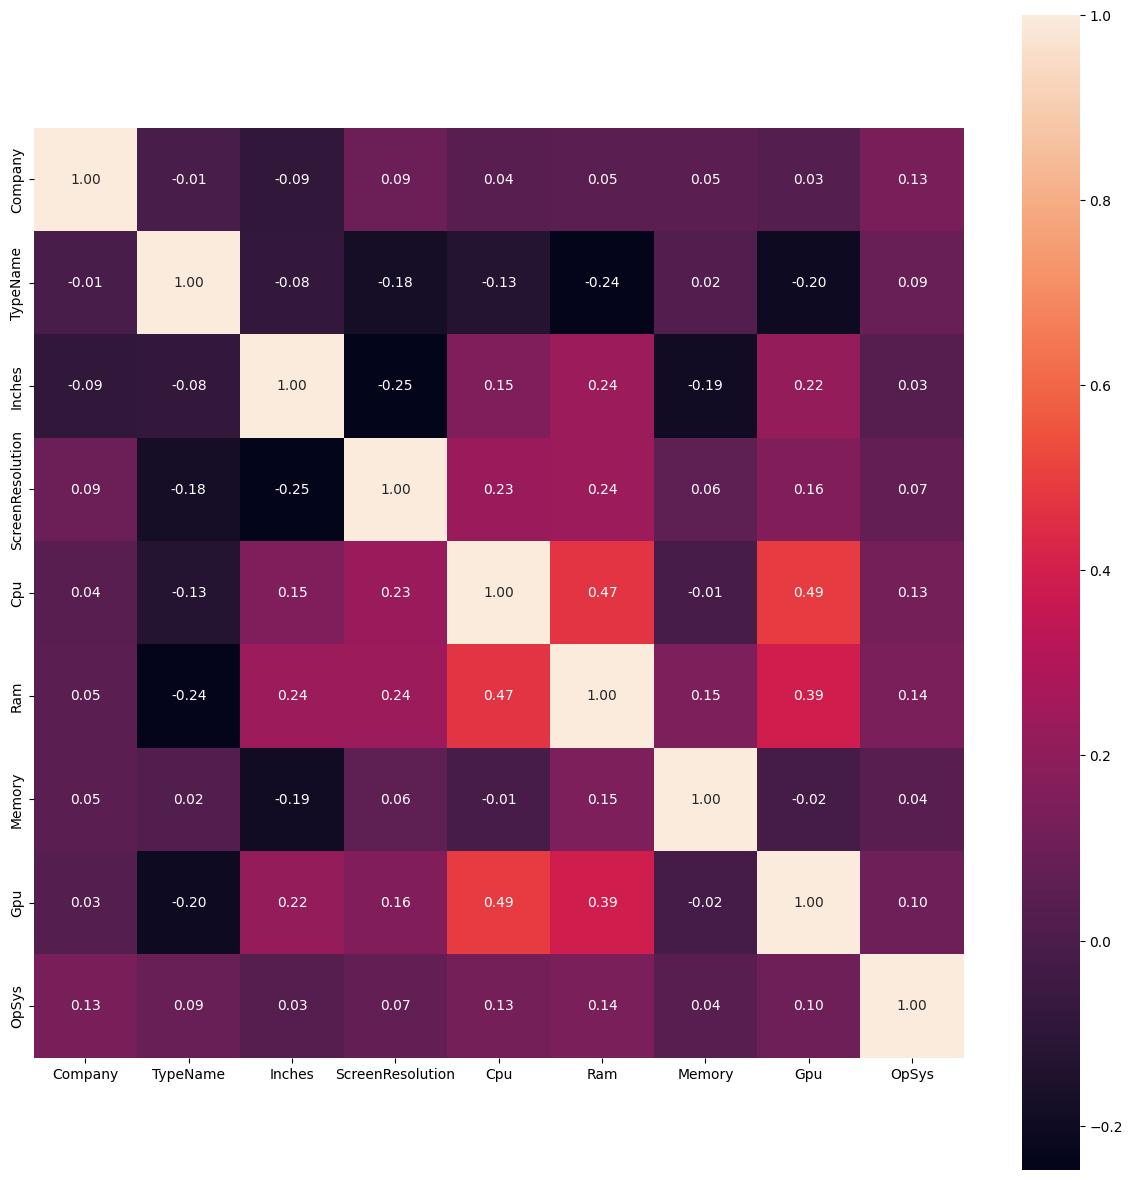

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:, :9].corr(), annot=True, square=True, fmt="0.2f", vmax=1)
plt.show()

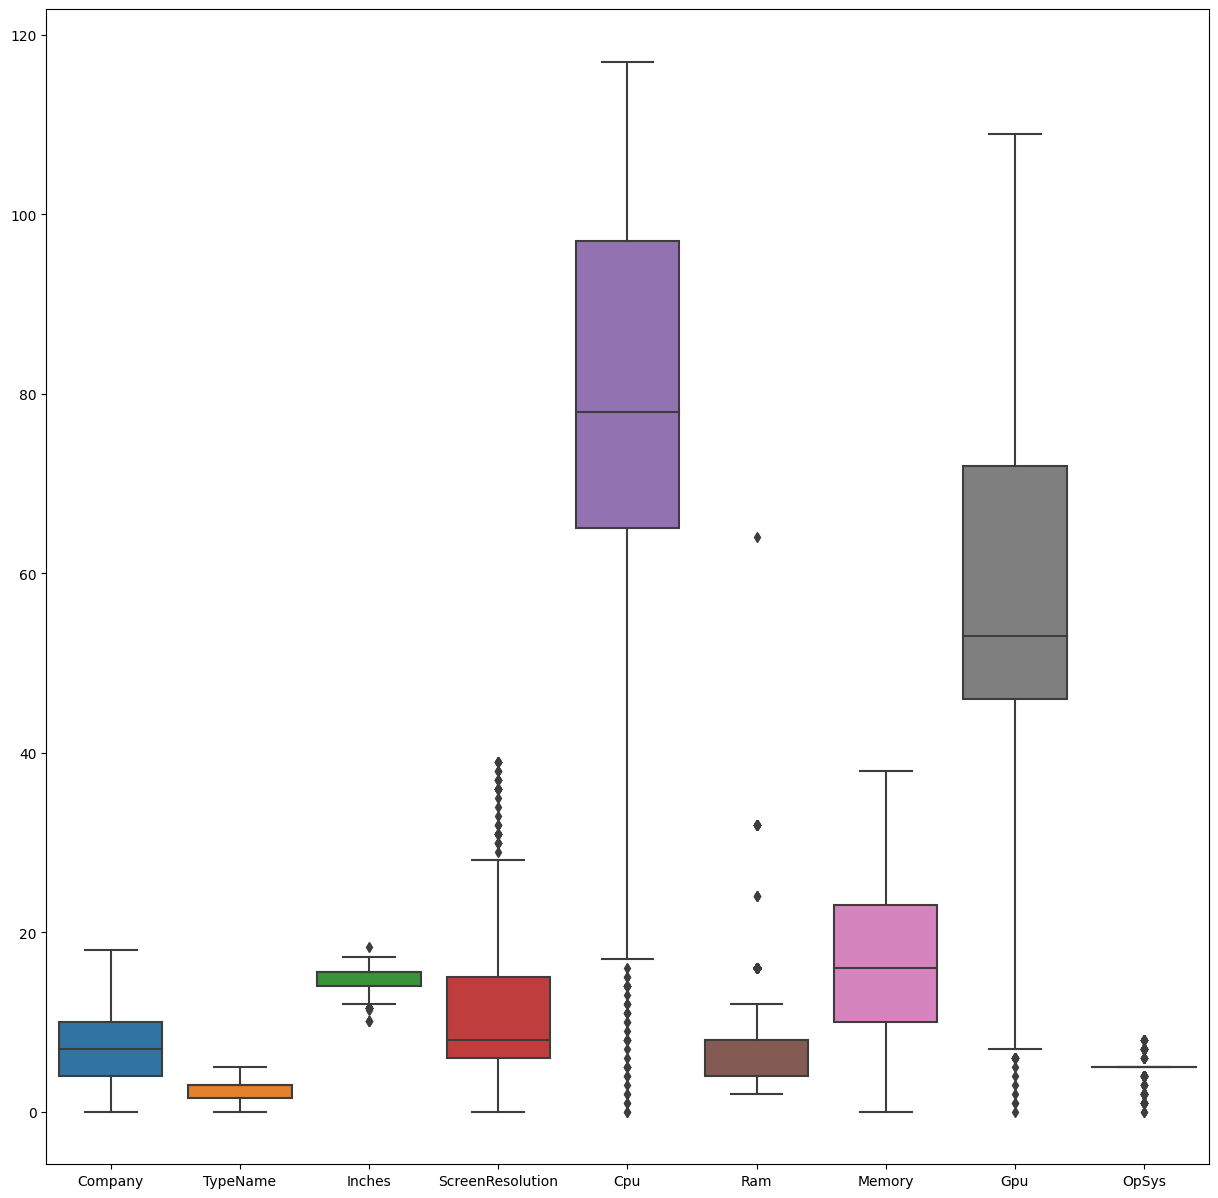

In [13]:
plt.figure(figsize=(15,15))
sns.boxplot(data.iloc[:, :9])
plt.show()

# Splitting Data

In [14]:
X = data.drop(columns="Price", axis=1)
Y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)

# Building Neural Network

In [15]:
model = k.models.Sequential([
    k.layers.Dense(128, activation="relu"),
    k.layers.Dense(64, activation="linear"),
    k.layers.Dense(32, activation="relu"),
    k.layers.Dense(16, activation="linear"),
    k.layers.Dense(1, activation="linear")
])

model.compile(optimizer=k.optimizers.RMSprop(0.001), loss='mae')

In [16]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/100
29/29 [==============================] - 1s 6ms/step - loss: 58520.3555 - val_loss: 59275.8164
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 51766.6523 - val_loss: 45109.9844
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 31305.5254 - val_loss: 22711.3379
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 21980.5859 - val_loss: 22067.6680
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 21622.6719 - val_loss: 21853.1328
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 21530.7266 - val_loss: 21707.9004
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 21360.0781 - val_loss: 21563.4297
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 21210.8398 - val_loss: 21440.7891
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 21012.8613 - val_loss: 21300.7754
Epoch 10/100
29/29 [=================

Epoch 77/100
29/29 [==============================] - 0s 2ms/step - loss: 15132.8389 - val_loss: 15757.6484
Epoch 78/100
29/29 [==============================] - 0s 2ms/step - loss: 15080.9219 - val_loss: 15619.1191
Epoch 79/100
29/29 [==============================] - 0s 2ms/step - loss: 15096.5430 - val_loss: 15951.3672
Epoch 80/100
29/29 [==============================] - 0s 2ms/step - loss: 15077.1436 - val_loss: 16260.6777
Epoch 81/100
29/29 [==============================] - 0s 2ms/step - loss: 15117.8252 - val_loss: 15653.4736
Epoch 82/100
29/29 [==============================] - 0s 2ms/step - loss: 15041.0645 - val_loss: 15818.3154
Epoch 83/100
29/29 [==============================] - 0s 2ms/step - loss: 15027.2129 - val_loss: 16098.7812
Epoch 84/100
29/29 [==============================] - 0s 2ms/step - loss: 15023.4004 - val_loss: 15984.2275
Epoch 85/100
29/29 [==============================] - 0s 2ms/step - loss: 15071.1084 - val_loss: 15577.6846
Epoch 86/100
29/29 [========

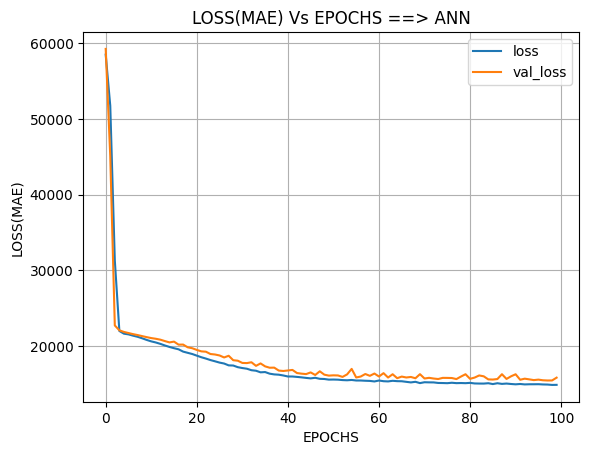

In [17]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("LOSS(MAE) Vs EPOCHS ==> ANN")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS(MAE)")
plt.legend()
plt.grid()
plt.show()

# Evalution

In [18]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 750us/step - loss: 15807.7393


15807.7392578125

In [20]:
print("THe R2_score is ==> ", r2_score(model.predict(x_test), y_test))

13/13 [==============================] - 0s 728us/step
THe R2_score is ==>  0.525915546981758
